### Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [2]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from numpy import linalg

In [4]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Hitters.csv"
Hitters = pd.read_csv(url)

In [5]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [6]:
# clean data
print(Hitters.shape)
Hitters = Hitters.dropna()

(322, 21)


In [7]:
Hitters.shape

(263, 21)

In [8]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [9]:
# converting categorical data into dummy variable
Hitters_1 = pd.get_dummies(Hitters, drop_first=True, columns=['League', 'Division', 'NewLeague'])
Hitters_1.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,632,43,10,475.0,1,1,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,880,82,14,480.0,0,1,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,200,11,3,500.0,1,0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,805,40,4,91.5,1,0,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,282,421,25,750.0,0,1,0


### Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

In [48]:
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary

In [49]:
# standardisation
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [50]:
n = 100
lambdas = (np.logspace(10, -2, num=100))

In [51]:
coefs = []
MSE = []
for k in lambdas:
    lassomod = Lasso(alpha=k, fit_intercept=True).fit(X_scaled,y)
    coefs.append(lassomod.coef_)
    MSE.append(mean_squared_error(y, lassomod.predict(X_scaled)))

In [52]:
coefPD = pd.DataFrame(coefs)

In [53]:
coefPD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0


In [54]:
coefPD.shape

(100, 19)

**The book finds the shape of the coefficient matrix to be (100, 20). This actually makes sense because the dataframe above
does not contain intercept. So, I will add the intercept at the beginning of each row.**

In [55]:
lassomod.intercept_

535.9258821292775

In [56]:
coefPD = pd.concat([pd.DataFrame([lassomod.intercept_]*100), coefPD], axis=1)
coefPD.columns = ['Intercept', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N']
coefPD.shape

(100, 20)

In [57]:
lambdas[49] # Python starts counting at 0. This will be equal to ridge.mod$lambda[50] in the book since R starts counting rows at 1.

11497.569953977356

In [58]:
coefPD.iloc[49]

Intercept      535.925882
AtBat            0.000000
Hits             0.000000
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks            0.000000
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.000000
CRuns            0.000000
CRBI             0.000000
CWalks           0.000000
PutOuts          0.000000
Assists          0.000000
Errors          -0.000000
League_N        -0.000000
Division_W      -0.000000
NewLeague_N     -0.000000
Name: 49, dtype: float64

In [59]:
lambdas[59]

705.4802310718645

In [60]:
coefPD.iloc[59]

Intercept      535.925882
AtBat            0.000000
Hits             0.000000
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks            0.000000
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.000000
CRuns            0.000000
CRBI             0.000000
CWalks           0.000000
PutOuts          0.000000
Assists          0.000000
Errors          -0.000000
League_N        -0.000000
Division_W      -0.000000
NewLeague_N     -0.000000
Name: 59, dtype: float64

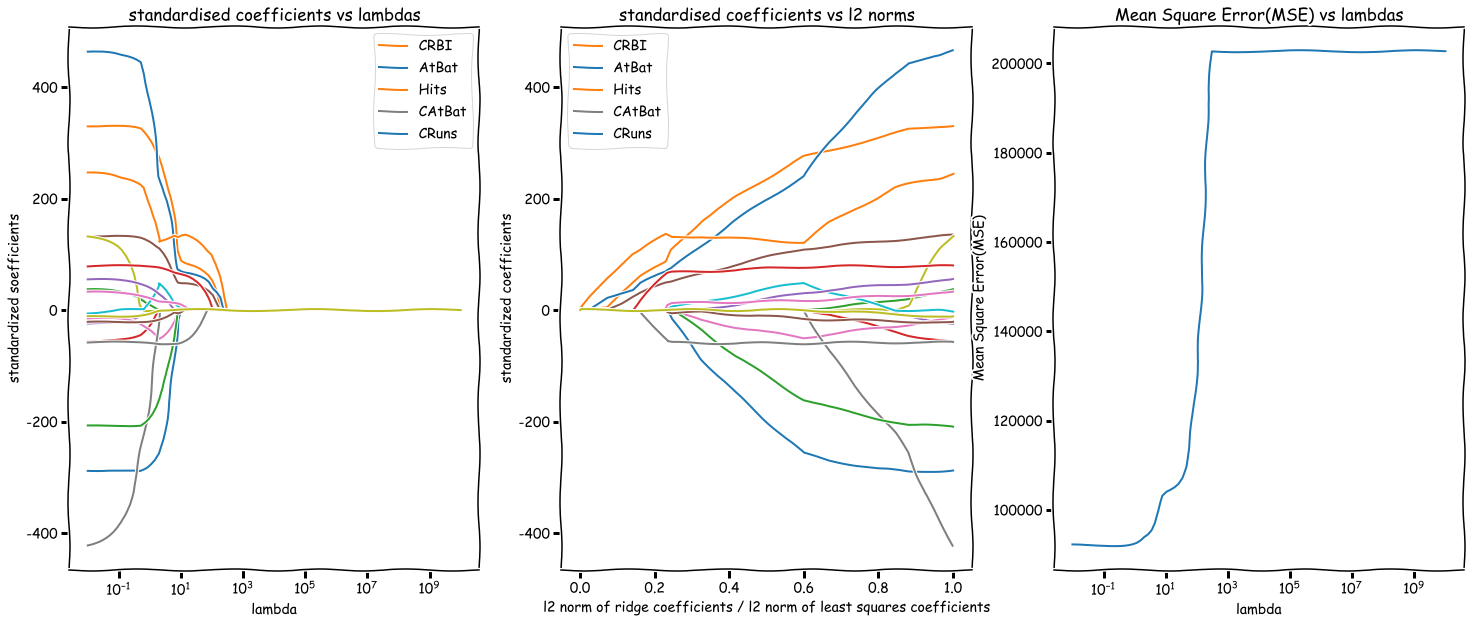

In [62]:
plt.xkcd()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,10))

# indexing the five largest coefficients
idx = np.argpartition(np.abs(coefs[-1]), -5)[-5:]

# standardised coefficients vs lambdas
ax1.plot(lambdas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('lambda')
ax1.set_ylabel('standardized soefficients')
ax1.set_title('standardised coefficients vs lambdas')
ax1.legend(np.array(ax1.get_lines())[idx], X.columns[idx])

# standardised coefficients vs l2 norms
l2norm = linalg.norm(coefs[-1])
l2coefs = linalg.norm(coefs/l2norm, axis=1)
ax2.plot(l2coefs, coefs)
ax2.set_xlabel('l2 norm of ridge coefficients / l2 norm of least squares coefficients')
ax2.set_ylabel('standardized coefficients')
ax2.set_title('standardised coefficients vs l2 norms')
ax2.legend(np.array(ax2.get_lines())[idx], X.columns[idx]);

# 'Mean Square Error(MSE) vs lambdas
ax3.plot(lambdas, MSE)
ax3.set_xscale('log')
ax3.set_xlabel('lambda')
ax3.set_ylabel('Mean Square Error(MSE)')
ax3.set_title('Mean Square Error(MSE) vs lambdas');

**It is quite interesting to note how different variables reach 0 at different intervals. This is better visualised in the
middle plot where different predictors enter the model one by one at different intervals.**

### Split dataset into training and test dataset (and standardise them)

In [63]:
from sklearn.model_selection import train_test_split
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [64]:
# standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# MSE with only the intercept
lmMSEintercept = np.mean(pow((y_train.mean()-y_test), 2))
print("MSE with only the intercept: ", lmMSEintercept)

# MSE for lambda = 0; this is similar to least squares linear regression
lmlasso0 = Lasso(alpha=0, fit_intercept=True).fit(X_train_scaled, y_train)
lmpredict0 = lmlasso0.predict(X_test_scaled)
lmMSE0 = mean_squared_error(y_test, lmpredict0)
print("MSE at lambda = 0: ", lmMSE0)

# MSE for lambda = 1
lmridge1 = Lasso(alpha=1, fit_intercept=True).fit(X_train_scaled, y_train)
lmpredict1 = lmridge1.predict(X_test_scaled)
lmMSE1 = mean_squared_error(y_test, lmpredict1)
print("MSE at lambda = 1: ", lmMSE1)

# MSE for lambda = 4
lmlasso4 = Lasso(alpha=4, fit_intercept=True).fit(X_train_scaled, y_train)
lmpredict4 = lmlasso4.predict(X_test_scaled)
lmMSE4 = mean_squared_error(y_test, lmpredict4)
print("MSE at lambda = 4: ", lmMSE4)

# MSE for lambda = pow(10, 10)
lmlasso1010 = Lasso(alpha=pow(10, 10), fit_intercept=True).fit(X_train_scaled, y_train)
lmpredict1010 = lmlasso1010.predict(X_test_scaled)
lmMSE1010 = mean_squared_error(y_test, lmpredict1010)
print("MSE at lambda = 10^10: ", lmMSE1010)

MSE with only the intercept:  234806.59791580262
MSE at lambda = 0:  140852.2960462381
MSE at lambda = 1:  138126.15508054447
MSE at lambda = 4:  143897.03760714506
MSE at lambda = 10^10:  234806.59791580247


### Ridge regression with cross-validation

In [74]:
# finding the best lambda using CV
from sklearn.linear_model import LassoCV
lmlassoCV = LassoCV(alphas=lambdas, cv=10).fit(X_train_scaled, y_train)
lmlassoCValpha = lmlassoCV.alpha_
print("Best lambda: ", lmlassoCValpha)

Best lambda:  14.174741629268018


In [75]:
# performing ridge regression using best lambda
lmlasso = Lasso(alpha=lmlassoCValpha, fit_intercept=True).fit(X_train_scaled, y_train)
lmlasso_MSE = mean_squared_error(y_test, lmlasso.predict(X_test_scaled))
print('MSE for best lambda: ', lmlasso_MSE)

MSE for best lambda:  150198.92762434622


In [76]:
intercept_list = pd.DataFrame([lmlasso.intercept_]*19)
coef_list = pd.concat([intercept_list, pd.DataFrame([lmlasso.coef_]).T], axis = 1)
coef_list.reset_index(inplace=True, drop=True)
coef_list.columns = ['Intercept', 'Coefficients']
coef_list

,Intercept,Coefficients
0,542.646863,0.000000
1,542.646863,149.043716
2,542.646863,26.153239
3,542.646863,0.000000
4,542.646863,0.000000
5,542.646863,11.207867
6,542.646863,0.000000
7,542.646863,0.000000
8,542.646863,0.000000
9,542.646863,0.000000


**Two points of note:**<br>
**1. The test errors of lasso regression are comparable to those of ridge regression.**
<br>
**2. 9 out of 18 coefficients are exactly 0. This suggests that lasso regression can perform feature selection as well as variance reduction.**